$$\textbf{Basins of Attraction}$$

**Step One:**


Here is some code to help you plot the basins of attraction for polynomials (a) - (c) in Project 1.

\First we need to write our Newton's Method Function.


In [1]:
#Goal to find a solution to f(x) = 0 given an initial approximation z0
#INPUT: function f; function f';init. approx. z0; tolerance TOL; max iterations MAX_IT
#OUTPUT: approximate solution z or FALSE if no convergence
import numpy as np
def my_newton(f,f_prime,z0,TOL,MAX_IT):
  #init guess
  z_n_minus_one = z0;
  for i in range(MAX_IT):
    #The range() function returns a sequence of numbers, starting from 0,
    #and increments by 1 until stopping before the specified number.
    #the newtons method step
    z_n = z_n_minus_one - f(z_n_minus_one)/f_prime(z_n_minus_one);
    #check if we've converged
    if np.absolute(z_n-z_n_minus_one)/np.absolute(z_n_minus_one) < TOL:
      #if so retutn nth term in sequence as root approx
      return z_n
    #else keep iterating
    z_n_minus_one = z_n;
  #if we exceed the number of iterations return bool False
  return False

:Now we write the code that will call Newton's Method to make the plot.

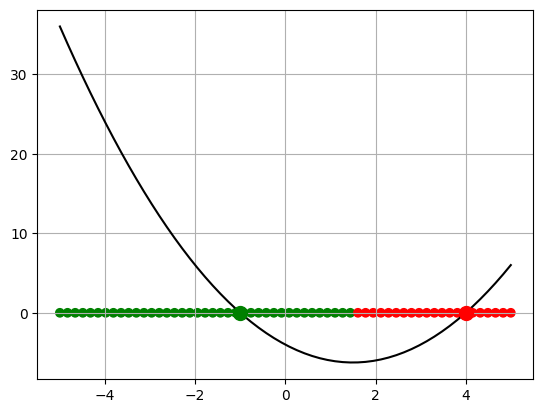

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#define the function
f = lambda x:(x-4)*(x+1)
#define derivative
f_prime = lambda x:2*x-3
#list actual roots
root1 = 4;
root2 = -1;
#make a list of x-values
x = np.linspace(-5,5,60)
#make an array to hold the root that
#each x value in our list converges to
basins = [];
for curr_x in x:
  #find the root curr_x converges to
  root = my_newton(f,f_prime,curr_x,1e-4,20);
  #add it to the list
  basins.append(root);

#At this point we have a list of x-values (x) and
#a list of the root each x-value converges to (basins)
#For example, x[3] = -4.491525423728813 
#and basins[3]= -1, which means the starting value -4.49
#converges to the root -1.

#Our goal is to plot the function and each starting value
#in the "x" array, but we want to color each starting
#value in the "x" array according to the root it converges to

#let root1 = 4 be red and root2 = -1 be green
#we will make an array of color vals so that
#for example for x[3] = -4.49, since it converges
#to -1 we want the color in the 3rd spot of the 
#colors array to be green

#make colors array corresponding to x vals
colors = [];
#iterate through the basins array
for i in range(0,len(basins)):
  #if the root in the ith spot of basins is close to root1
  if abs(basins[i]-root1)< 1e-3:
    #put the color red in the ith spot of colors
    colors.append('r');
  else:
    #if not then put the color green
    colors.append('g');

#############PLOTTING RESULTS#################
#we need this vector to plot each x value 
#in the x array as a point on the x-axis
zeros = np.zeros(len(x));
#plot the function evaluated at those x-values
plt.plot(x,f(x),'k-')
#plot the root x = 4
plt.plot(4,0,marker="o", markersize=10, markeredgecolor="red",markerfacecolor="red")
#plot the root x = -1
plt.plot(-1,0,marker="o", markersize=10, markeredgecolor="green",markerfacecolor="green")
#plot the intial x-values according to the root they converge to
plt.scatter(x,zeros,c=colors)
#show the grid
plt.grid()
#show the plot
plt.show()

$$\textbf{From Newton's Method to Newton's Fractal}$$

Let us plot the basins of attraction for $f(z) = z^3-1$ on the domain $\{x + iy~|~(x,y) \in [-2,2] \times [-2,2] \}$ in the complex plane.


We begin by creating an $n \times m$ grid of points in this domain. We will discretize the real and imaginary axes separately, and then use${~\tt np.meshgrid()}$ to turn them into a single grid of complex numbers.

In [3]:
import numpy as np
min_real = -1;
max_real = 1;
min_imag = -1;
max_imag = 1;
n = 10;
m = 10;
xreal = np.linspace(min_real, max_real, m)
ximag = np.linspace(min_imag, max_imag, n)
Xreal, Ximag = np.meshgrid(xreal, ximag)

To get an idea of what this code just did lets plot ,${~\tt Xreal~and~Ximag}$ below.

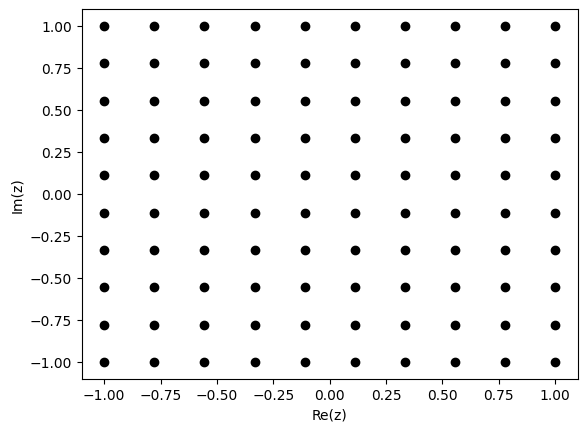

In [4]:
import matplotlib.pyplot as plt
plt.plot(Xreal, Ximag, marker='o', color='k', linestyle='none')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.show()

Recall that $1j$ is the complex number $i$ in NumPy. The array ${\tt Xinit}$ will contain $n \times m$ complex points evenly spaced in the given domain.

In [5]:
Xinit = Xreal+1j*Ximag;

How can we extract the imaginary numbers from the ${\tt Xinit}$ array we just created? 

Below is one way to iterate through all the numbers in ${\tt Xinit}$.

In [6]:
# Recall we will have n*m numbers
num = 1 #num will keep track of how many numbers we've printed
for i in Xinit:
  print(i)
  for j in i:
    print("Coordinate point is :" , j)
    print("This is the", num, "coordinate point")
    num = num+1;

[-1.        -1.j -0.77777778-1.j -0.55555556-1.j -0.33333333-1.j
 -0.11111111-1.j  0.11111111-1.j  0.33333333-1.j  0.55555556-1.j
  0.77777778-1.j  1.        -1.j]
Coordinate point is : (-1-1j)
This is the 1 coordinate point
Coordinate point is : (-0.7777777777777778-1j)
This is the 2 coordinate point
Coordinate point is : (-0.5555555555555556-1j)
This is the 3 coordinate point
Coordinate point is : (-0.33333333333333337-1j)
This is the 4 coordinate point
Coordinate point is : (-0.11111111111111116-1j)
This is the 5 coordinate point
Coordinate point is : (0.11111111111111116-1j)
This is the 6 coordinate point
Coordinate point is : (0.33333333333333326-1j)
This is the 7 coordinate point
Coordinate point is : (0.5555555555555554-1j)
This is the 8 coordinate point
Coordinate point is : (0.7777777777777777-1j)
This is the 9 coordinate point
Coordinate point is : (1-1j)
This is the 10 coordinate point
[-1.        -0.77777778j -0.77777778-0.77777778j -0.55555556-0.77777778j
 -0.33333333-0.77

Cool, so we learned how to create a bunch of poit in the complex plane.Now we need to write a couple of different python functions in order to plot the basins of attraction for the given complex function.

In this example, it's not as easy to compute the exact roots. So, we will write a function that stores all the unique roots found when using Newton's Method on the set of initial points in Xinit.

Moreover, for each point in Xinit, our function will use a matrix to record the root it converges to.

In [26]:
#This function keeps track of what root each point in Xinit converges to
#and creates a list of all the unique roots
#INPUT: function f, function fprime, Xinit,n,m
#OUTPUT: matrix of size m,n where the entries are the index 
#of the root that initial guess m,n in Xinit converges to 
TOL = 1.e-8;
MAX_IT = 1000;
def my_newton_find_roots(f,fprime, Xinit,n,m):
  #this array will store the unique roots of f as we find them
  roots = [];
  #this n xm matrix will store the root each intial guess converges to
  convergence_mat = np.zeros((n,m));
  #rows of Xinit
  for i in range(0,Xinit.shape[0]):
    #cols of Xinit
    for j in range(0,Xinit.shape[1]):
      z0 = Xinit[i,j];
      r = my_newton(f,fprime,z0,TOL,MAX_IT)
      if r is not False:
        #find the index of the root within TOL of r in the roots array
        #or add r to the roots array
        #get_root_index(roots,r) is a new function defined in the next code cell
        my_root = get_root_index(roots,r)
        #add the index of r to the correct spot in convergence matrix for plotting
        convergence_mat[i,j] = my_root;
  return convergence_mat,roots

In [25]:
#This function keeps track of unique roots found
#For a root r, if r is already in the roots array this function returns
#the index of r in the roots array so we can store it in the convergence mat
#for coloring the complex plane later
#INPUTS: roots array, r current root returned by Newtons Method 
def get_root_index(roots,r):
  #first we're gonna see if r has already been added to the roots array
  #we have a root approximation r, and we check to see if any other value in
  #the roots array is within TOL of our current root r
  try:
    #if we can find a value, call it R, in the roots array that is within TOL
    #of the current root approximation, r, then we return the index of R 
    #in the roots array.
    return np.where(np.isclose(roots, r, atol=TOL))[0][0]
  #if we dont find a value close to r that means we havent added it to the
  #roots array yet
  except IndexError:
    #we add it here
    roots.append(r)
    #this is taking the length of the roots array and subtracting one
    #so that we return the last index of the roots array, indexing starts
    #at 0 so that is why we do len(root)-1
    return len(roots) - 1

Now we use all our functions to make the Newton's Fractal!


In [9]:
#define and Xinit
min_real = -1;
max_real = 1;
min_imag = -1;
max_imag = 1;
n = 200;
m = 200;
xreal = np.linspace(min_real, max_real, m)
ximag = np.linspace(min_imag, max_imag, n)
Xreal, Ximag = np.meshgrid(xreal, ximag)
Xinit = Xreal+1j*Ximag;
#pick the function you want to plot
f = lambda z: z**3 - 2
fprime = lambda z: 3*(z**2)
#call the functions we just made, make sure you compiled
#my_newton at top of notebook
convergence_mat,roots = my_newton_find_roots(f,fprime,Xinit,n,m)

We've run our code, now we need to plot the results!


Total number of roots is: 3


C:\Users\jling\AppData\Local\Temp\ipykernel_24148\868738006.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('Spectral', nroots)


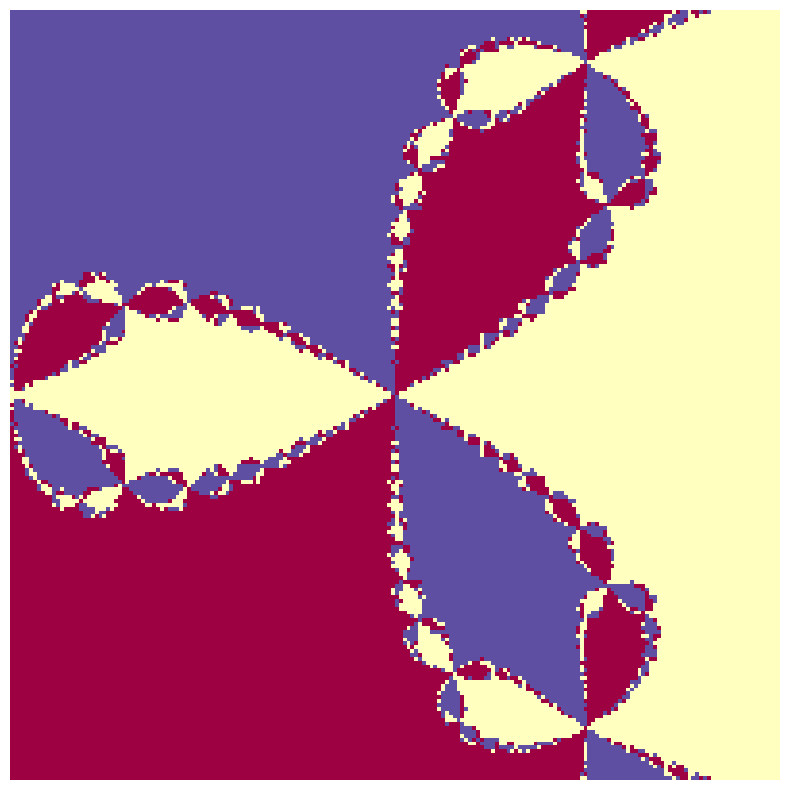

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.figure(figsize=(10,10))
#let's check and see how many roots we found.
#How can we check if it's the right number?
nroots = len(roots)
print("Total number of roots is:", nroots)

#Recall, we are going to color the complex plane in the following way:
#Xinit contains a bunch of points in the complex plain.
#We use Newton's Method to find out what root each of those points converges to.
#We stored the roots in an array.
#Now for point (i,j) in Xinit, convergence_mat(i,j) returned by our function
#holds the index of the root in the roots array that the point (i,j) converged to.
#Lets make a list of colors.
colors = cm.get_cmap('Spectral', nroots)
#each index in the roots array corresponds to a color in colors array
#this next line will take an n x m square, and color each pixel 
#corresponding to the root index in the convergence_mat
plt.imshow(convergence_mat, cmap=colors, origin='lower')
plt.axis('off')
plt.show()